In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import sklearn.metrics as metrics

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
 
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

from sklearn.preprocessing import LabelEncoder

In [2]:
random.seed(16)

In [3]:
df = pd.read_csv('../../clean_2019_binary_2.csv')
df.head()

,balls,strikes,on_1b,outs_when_up,inning,pitch,offspeed_in_sequence,fastball_in_sequence,proportion_of_fastballs_thrown_2018,previous_pitch,...,if_fielding_alignment_Standard,of_fielding_alignment_4th outfielder,of_fielding_alignment_Standard,risp,run_diff,inning_topbot_Top,previous_type_B,previous_type_S,hitter_woba_2018,average_hitter_launch_speed_2018
0,3.0,2.0,0.0,2.0,9.0,0,1,5,0.558863,1,...,0,0,1,0,4.0,0,0,1,0.366304,90.160819
1,3.0,2.0,0.0,2.0,9.0,1,1,4,0.558863,1,...,0,0,1,0,4.0,0,1,0,0.366304,90.160819
2,2.0,2.0,0.0,2.0,9.0,1,1,3,0.558863,1,...,0,0,1,0,4.0,0,0,1,0.366304,90.160819
3,2.0,1.0,0.0,2.0,9.0,1,1,2,0.558863,0,...,0,0,1,0,4.0,0,1,0,0.366304,90.160819
4,1.0,1.0,0.0,2.0,9.0,0,0,2,0.558863,1,...,0,0,1,0,4.0,0,0,1,0.366304,90.160819


In [154]:
df['previous_pitch'].value_counts()

1    209419
0    148976
3    122904
Name: previous_pitch, dtype: int64

In [130]:
def binary_classification_metrics(gs, X_test, y_test):
    
    y_hat = gs.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_hat)

    #specificity = true negative/(true neagtive +false positive)
    specificity = 1984/(1984+21) 

    sensitivity =  metrics.recall_score(y_test, y_hat)

    precision = metrics.precision_score(y_test, y_hat)

    f1 = metrics.f1_score(y_test, y_hat)
    
    
    print('My accuracy is: ', round(accuracy,4))
    print('My specificity is: ', round(specificity, 4))
    print('My sensitivity is: ', round(sensitivity,4))
    print('My precision is: ', round(precision,4))
    print('My f1 score is: ', round(precision,4))
    
    cm = np.array([['True Negative', 'False Positive'],
                            ['False Negative', 'True Positive']])

    cm = pd.DataFrame(cm,columns = ['Pred Offspeed', 'Pred Fastball'], 
                      index = ['Actual Offspeed','Actual Fastball'])
    
    # Displaying sample confusion matrix
    display(cm)

    # Displaying actual confusion matrix 
    metrics.plot_confusion_matrix(gs, X_test, y_test, cmap='Accent', 
                          values_format='d', display_labels=['Offspeed Pitch', 
                                                             'Fastball Pitch']);
    
    metrics.plot_roc_curve(gs, X_test, y_test)
    # add worst case scenario line
    plt.plot([0, 1], [0, 1])
    plt.title('ROC AUC Curve');
    
    return f'My ROC AUC score is: {metrics.roc_auc_score(y_test, y_hat)}'

In [5]:
df['pitch'].value_counts()

1    281249
0    200050
Name: pitch, dtype: int64

In [6]:
df.isna().sum()

balls                                   0
strikes                                 0
on_1b                                   0
outs_when_up                            0
inning                                  0
pitch                                   0
offspeed_in_sequence                    0
fastball_in_sequence                    0
proportion_of_fastballs_thrown_2018     0
previous_pitch                          0
previous_zone                           0
stand_R                                 0
p_throws_R                              0
if_fielding_alignment_Infield shift     0
if_fielding_alignment_Standard          0
of_fielding_alignment_4th outfielder    0
of_fielding_alignment_Standard          0
risp                                    0
run_diff                                0
inning_topbot_Top                       0
previous_type_B                         0
previous_type_S                         0
hitter_woba_2018                        0
average_hitter_launch_speed_2018  

In [7]:
X = df.drop(columns=['pitch'])
y = df['pitch']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    random_state=16, stratify=y)

In [9]:
y_test.value_counts()

1    70312
0    50013
Name: pitch, dtype: int64

In [10]:
pipe = Pipeline([
    
    ('mm', MinMaxScaler()),
    ('lr', LogisticRegression())
    
])

In [11]:
# Creating dictionary of parameters to gridsearch over
params = {
    'lr__solver': ['liblinear','saga'],
    'lr__penalty': ['l1','l2', 'elasticnet'],
    'lr__C' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'lr__class_weight': [None, 'balanced']
}

In [12]:
# Instantietating gridsearch with pipeline
gs_f1 = GridSearchCV(pipe, param_grid=params, n_jobs=-1, verbose=1, cv=5, scoring='f1_weighted')

In [13]:
gs_f1.fit(X_train, y_train);

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 15.2min finished


My accuracy is:  0.5993
My specificity is:  0.9895
My sensitivity is:  0.5979
My precision is:  0.6783
My f1 score is:  0.6783


,Pred Offspeed,Pred Fastball
Actual Offspeed,True Negative,False Positive
Actual Fastball,False Negative,True Positive


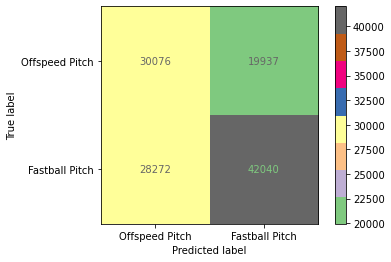

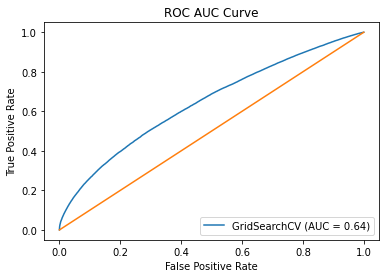

In [14]:
binary_classification_metrics(gs_f1, X_test, y_test);

In [15]:
gs_accuracy = GridSearchCV(pipe, param_grid=params, n_jobs=-1, verbose=1, cv=5, scoring='accuracy')

In [16]:
gs_accuracy.fit(X_train, y_train);

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 15.2min finished


My accuracy is:  0.6119
My specificity is:  0.9895
My sensitivity is:  0.814
My precision is:  0.63
My f1 score is:  0.63


,Pred Offspeed,Pred Fastball
Actual Offspeed,True Negative,False Positive
Actual Fastball,False Negative,True Positive


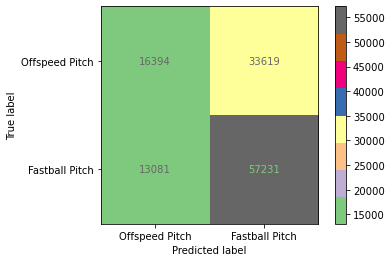

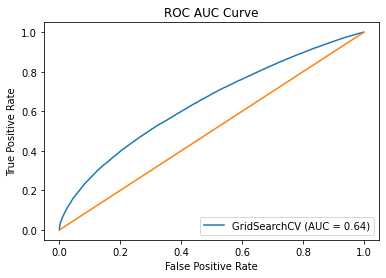

In [17]:
binary_classification_metrics(gs_accuracy, X_test, y_test);

In [18]:
df_2 = df

In [19]:
vif = pd.DataFrame()
vif['vif_factor'] = [variance_inflation_factor(X.values, i) 
                     for i in range(X.shape[1])]

vif['features'] = X.columns

vif['features'] = X.columns

vif

,vif_factor,features
0,9.755854,balls
1,10.724772,strikes
2,1.550963,on_1b
3,2.577844,outs_when_up
4,4.552998,inning
5,5.465121,offspeed_in_sequence
6,10.504928,fastball_in_sequence
7,33.855398,proportion_of_fastballs_thrown_2018
8,24.273637,previous_pitch
9,10.750593,previous_zone


In [20]:
vif[vif['vif_factor'] > 10]

,vif_factor,features
1,10.724772,strikes
6,10.504928,fastball_in_sequence
7,33.855398,proportion_of_fastballs_thrown_2018
8,24.273637,previous_pitch
9,10.750593,previous_zone
15,10.911063,of_fielding_alignment_Standard
19,25.404081,previous_type_B
20,25.522044,previous_type_S
21,102.065072,hitter_woba_2018
22,259.013660,average_hitter_launch_speed_2018


In [21]:
df_2 = df.drop(columns=['previous_type_S', 'average_hitter_launch_speed_2018',
                      'previous_type_B','previous_pitch', 'proportion_of_fastballs_thrown_2018',
                       'hitter_woba_2018'])

In [22]:
X_2 = df_2.drop(columns=['pitch'])
y_2 = df_2['pitch']

In [23]:
vif = pd.DataFrame()
vif['vif_factor'] = [variance_inflation_factor(X_2.values, i) 
                     for i in range(X_2.shape[1])]

vif['features'] = X_2.columns

vif['features'] = X_2.columns

vif

,vif_factor,features
0,8.604490,balls
1,8.151784,strikes
2,1.546364,on_1b
3,2.489875,outs_when_up
4,4.015525,inning
5,5.095550,offspeed_in_sequence
6,9.172383,fastball_in_sequence
7,4.062047,previous_zone
8,2.601607,stand_R
9,3.458584,p_throws_R


In [24]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.25, 
                                                    random_state=16, stratify=y)

In [25]:
gs_2 = GridSearchCV(pipe, param_grid=params, n_jobs=-1, verbose=1, cv=5, scoring='accuracy')

In [26]:
gs_2.fit(X_train_2, y_train_2);

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  6.3min finished


My accuracy is:  0.5919
My specificity is:  0.9895
My sensitivity is:  0.8631
My precision is:  0.6058
My f1 score is:  0.6058


,Pred Offspeed,Pred Fastball
Actual Offspeed,True Negative,False Positive
Actual Fastball,False Negative,True Positive


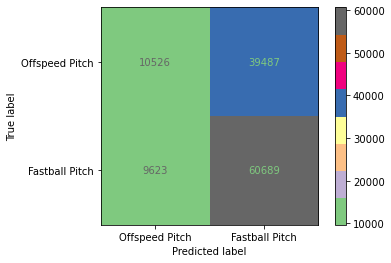

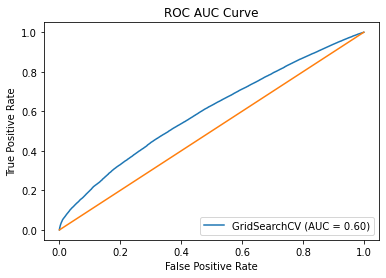

In [27]:
binary_classification_metrics(gs_2, X_test_2, y_test_2);

In [132]:
mm = MinMaxScaler()

In [133]:
X_train_mm = mm.fit_transform(X_train)
X_test_mm = mm.transform(X_test)

In [134]:
pca = PCA().fit(X_train_mm)

pca.explained_variance_ratio_

array([0.16135106, 0.15485173, 0.14800324, 0.09022729, 0.08675253,
       0.074353  , 0.06047946, 0.05550631, 0.04624949, 0.02912563,
       0.02387699, 0.01320415, 0.01208362, 0.01094284, 0.00927497,
       0.00789535, 0.00472103, 0.00362597, 0.003152  , 0.00243963,
       0.00106114, 0.00041439, 0.00040818])

In [135]:
pipe_2 = Pipeline([
    ('mm', MinMaxScaler()),
    ('pca', PCA()),
    ('lr', LogisticRegression())
])

In [136]:
params_2 = {
    'pca__n_components': [15],
     'lr__solver': ['liblinear','saga'],
    'lr__penalty': ['l1','l2', 'elasticnet'],
    'lr__C' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'lr__class_weight': [None, 'balanced']
}

In [137]:
gs_3 = GridSearchCV(pipe_2, params_2, cv = 5,
                    scoring = 'accuracy', verbose = 1, n_jobs = -1)

In [138]:
gs_3.fit(X_train, y_train);


Fitting 3 folds for each of 96 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:  6.6min finished


My accuracy is:  0.5864
My specificity is:  0.9895
My sensitivity is:  0.8965
My precision is:  0.5974
My f1 score is:  0.5974


,Pred Offspeed,Pred Fastball
Actual Offspeed,True Negative,False Positive
Actual Fastball,False Negative,True Positive


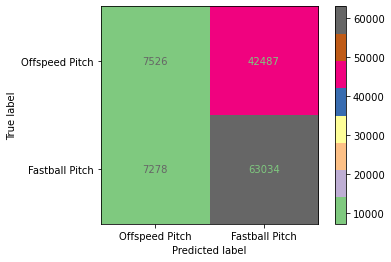

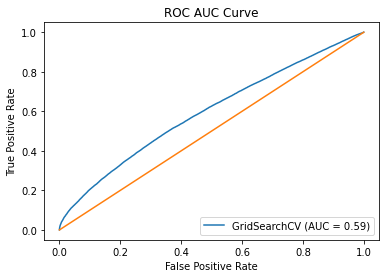

In [139]:
binary_classification_metrics(gs_3, X_test, y_test);

In [ ]:
## Dummy variables

In [140]:
dummy_df = pd.get_dummies(data=df, columns=['balls', 'strikes', 'outs_when_up',
                                           'inning', 'previous_pitch', 
                                            'previous_zone'], drop_first=True)



In [146]:
X_3 = dummy_df.drop(columns = ['pitch'])
y_3 = dummy_df['pitch']

In [147]:
X_train_dum, X_test_dum, y_train_dum, y_test_dum = train_test_split(X_3, y_3, test_size=0.25, 
                                                    random_state=16, stratify=y)

In [148]:
gs_f2 = GridSearchCV(pipe, param_grid=params, n_jobs=-1, verbose=1, cv=5, scoring='f1_weighted')

In [149]:
gs_f2.fit(X_train_dum, y_train_dum)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   45.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 89.0min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 91.5min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('mm', MinMaxScaler()),
                                       ('lr', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'lr__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'lr__class_weight': [None, 'balanced'],
                         'lr__penalty': ['l1', 'l2', 'elasticnet'],
                         'lr__solver': ['liblinear', 'saga']},
             scoring='f1_weighted', verbose=1)

My accuracy is:  0.601
My specificity is:  0.9895
My sensitivity is:  0.5898
My precision is:  0.684
My f1 score is:  0.684


,Pred Offspeed,Pred Fastball
Actual Offspeed,True Negative,False Positive
Actual Fastball,False Negative,True Positive


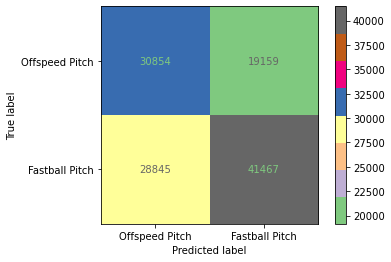

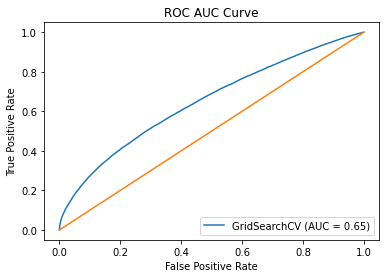

In [150]:
binary_classification_metrics(gs_f2, X_test_dum, y_test_dum);

In [151]:
gs_accuracy_2 = GridSearchCV(pipe, param_grid=params, n_jobs=-1, verbose=1, 
                             cv=5, scoring='accuracy')

In [152]:
gs_accuracy_2.fit(X_train_dum, y_train_dum)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   42.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 96.1min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 98.6min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('mm', MinMaxScaler()),
                                       ('lr', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'lr__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'lr__class_weight': [None, 'balanced'],
                         'lr__penalty': ['l1', 'l2', 'elasticnet'],
                         'lr__solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=1)

My accuracy is:  0.6137
My specificity is:  0.9895
My sensitivity is:  0.8055
My precision is:  0.6333
My f1 score is:  0.6333


,Pred Offspeed,Pred Fastball
Actual Offspeed,True Negative,False Positive
Actual Fastball,False Negative,True Positive


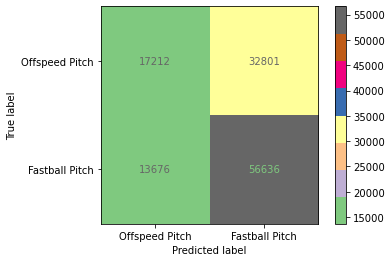

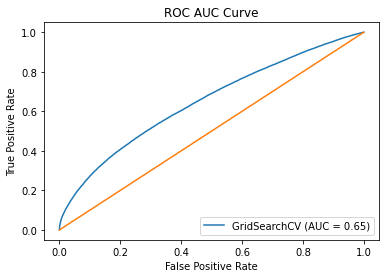

In [153]:
binary_classification_metrics(gs_accuracy_2, X_test_dum, y_test_dum);

In [37]:
# Multi-class logistic regression

In [68]:
df_3 = pd.read_csv('../../clean_2019_3.csv')

In [69]:
df_3.isna().sum()

Unnamed: 0                              0
balls                                   0
strikes                                 0
on_1b                                   0
outs_when_up                            0
inning                                  0
pitch                                   0
1                                       0
offspeed_in_sequence                    0
fastball_in_sequence                    0
pitch_2                                 0
proportion_of_fastballs_thrown_2018     0
previous_pitch                          0
previous_zone                           0
stand_R                                 0
p_throws_R                              0
if_fielding_alignment_Infield shift     0
if_fielding_alignment_Standard          0
of_fielding_alignment_4th outfielder    0
of_fielding_alignment_Standard          0
risp                                    0
run_diff                                0
inning_topbot_Top                       0
previous_type_B                   

In [70]:
X_3 = df_3.drop(columns=['pitch'])
y_3 = df_3['pitch']

In [71]:
le = LabelEncoder()
y_3 = le.fit_transform(y_3)

In [72]:
y_3

array([1, 2, 2, ..., 0, 0, 2])

In [73]:
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(X_3, y_3, test_size=0.25, 
                                                    random_state=16)

In [74]:
pipe_3 = Pipeline([
    ('mm', MinMaxScaler()),
    ('lr', LogisticRegression())
])

In [75]:
params_3 = {
    'lr__solver': ['saga'],
    'lr__penalty': ['l1','l2', 'elasticnet'],
    'lr__C' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'lr__class_weight': [None, 'balanced'],
    'lr__multi_class' : ['ovr', 'multinomial']
}

In [76]:
gs_4 = GridSearchCV(pipe_3, param_grid=params_3, n_jobs=-1, verbose=1, cv=5, scoring='accuracy')

In [77]:
gs_4.fit(X_train_mc, y_train_mc);

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 19.7min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 21.1min finished


In [78]:
gs_4.score(X_train_mc, y_train_mc)


0.5947685982923978

In [79]:
gs_4.score(X_test_mc, y_test_mc)

0.5932682318720133

In [117]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    #hpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    y_test_columns = ['Fastball', 'Breaking Ball', 'Changeup']
    
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = metrics.roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for %s' % (roc_auc[i], 
                                                                y_test_columns[i])) #% (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()



In [118]:
def multiclass_classification_metrics(gs, X_test, y_test):
    
    y_hat = gs.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_hat)

    #specificity = true negative/(true neagtive +false positive)
    specificity = 1984/(1984+21) 

    sensitivity =  metrics.recall_score(y_test, y_hat, average='macro')

    precision = metrics.precision_score(y_test, y_hat, average='macro')

    f1 = metrics.f1_score(y_test, y_hat, average='macro')
    
    
    print('My accuracy is: ', round(accuracy,4))
    print('My specificity is: ', round(specificity, 4))
    print('My sensitivity is: ', round(sensitivity,4))
    print('My precision is: ', round(precision,4))
    print('My f1 score is: ', round(precision,4))
    

    metrics.plot_confusion_matrix(gs, X_test, y_test, cmap='Accent', 
                          values_format='d', display_labels=[ 'Change-up',
                                                              'Breaking Ball', 
                                                             'Fastball']);
    
    plot_multiclass_roc(gs, X_test, y_test, 3, figsize=(17, 6))

My accuracy is:  0.5933
My specificity is:  0.9895
My sensitivity is:  0.3798
My precision is:  0.5363
My f1 score is:  0.5363
['Fastball', 'Breaking Ball', 'Changeup']


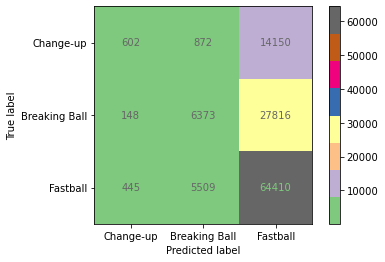

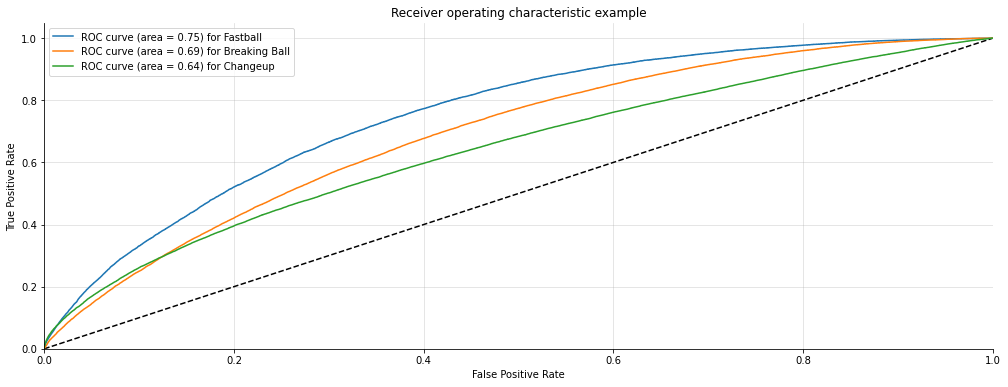

In [119]:
multiclass_classification_metrics(gs_4, X_test_mc, y_test_mc)

My accuracy is:  0.612
My specificity is:  0.9895
My sensitivity is:  0.8139
My precision is:  0.63
My f1 score is:  0.63


,Pred Offspeed,Pred Fastball
Actual Offspeed,True Negative,False Positive
Actual Fastball,False Negative,True Positive


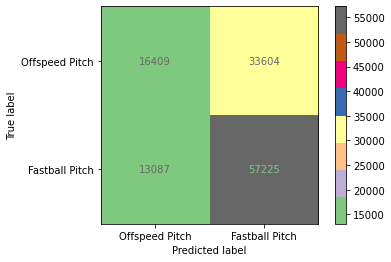

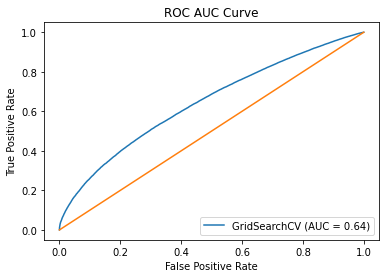

In [45]:
# binary_classification_metrics(gs_4, X_test_mc, y_test_mc);

In [122]:
gs_5 = GridSearchCV(pipe_3, param_grid=params_3, n_jobs=-1, verbose=1, cv=5, scoring='f1_weighted')

In [123]:
gs_5.fit(X_train_mc, y_train_mc);

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 18.2min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 19.5min finished


My accuracy is:  0.5923
My specificity is:  0.9895
My sensitivity is:  0.398
My precision is:  0.5174
My f1 score is:  0.5174
['Fastball', 'Breaking Ball', 'Changeup']


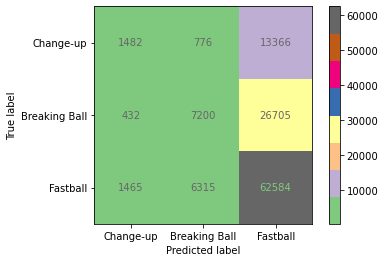

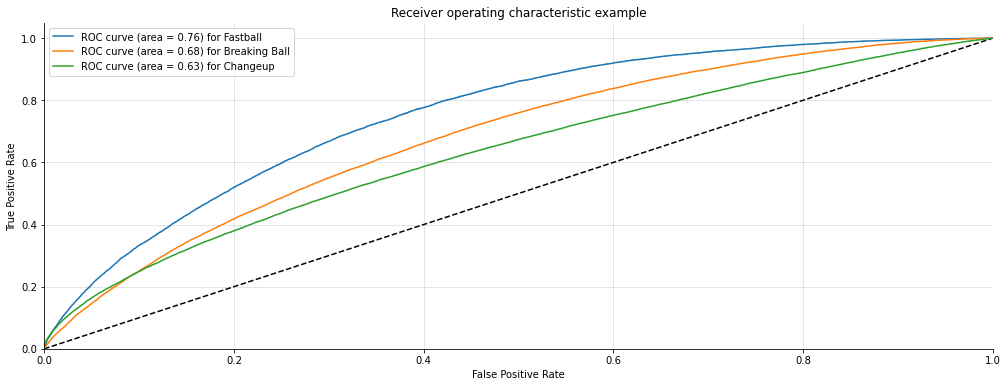

In [124]:
multiclass_classification_metrics(gs_5, X_test_mc, y_test_mc)